# **Lab 0 - Explainable and Trustworthy AI**


---




**Teaching Assistant**: *Gabriele Ciravegna*


# **Lab 0 (2):** Introduction to Deep Learning in Pytorch
PyTorch provides the elegantly designed modules and classes [torch.nn](https://pytorch.org/docs/stable/nn.html), [torch.optim](https://pytorch.org/docs/stable/optim.html), [Dataset](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset), and [DataLoader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader)
to help you create and train neural networks.

In order to fully utilize their power and customize them for your problem, you need to really understand exactly what they're doing. To develop this understanding, we will first train basic neural net on the digits data set without using any features from these models; we will initially only use the most basic PyTorch tensor functionality. Then, we will incrementally add features from:
1. ``torch.nn``
2. ``torch.optim``
3. ``Dataset``
4. ``DataLoader``

We will add one module at a time, showing exactly what each module does, and how it makes the code either more concise, or more flexible.

**This tutorial assumes you already have PyTorch installed, and are familiar with the basics of tensor operations.** (If you're familiar with Numpy array operations, you'll find the PyTorch tensor operations used here nearly identical).

# Exercise 0: Library loading and installation
In case you don't have installed in your local computer the torch, numpy and scikit-learn packages, you can install them by running the following commands:
```bash
!pip install numpy
!pip install torch
!pip install scikit-learn
```

In [102]:
%matplotlib inline
!pip install numpy
!pip install torch
!pip install scikit-learn

# Exercise1: Digits Prediction

In this exercise we will train a simple logistic regression model to classify the digits in the  [**digits**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset, a simplified version of the [mnist](http://deeplearning.net/data/mnist/) dataset provided by scikit-learn.
It consists of black-and-white images of hand-drawn digits (between 0 and 9).


## Exercise 1.1: Data Loading and Visualization
Similarly, to the previous lab, we will download it as a dataframe from scikit-learn.


In [103]:
from sklearn.datasets import load_digits
import numpy as np
import torch

### ENTER YOUR CODE HERE (3-4 lines expected)
#load_digits returns A DICTIONARY
df = load_digits(as_frame = True)
#print(df.keys())

x = df.data
y = df.target
n_samples = len(df.data)
n_features = len(df.feature_names)
n_classes = len(np.unique(df.target))

print(f"Number of samples: {n_samples}, Number of features: {n_features}")
print(f"Labels range {y.min()} - {y.max()}, Number of classes: {n_classes}")


Number of samples: 1797, Number of features: 64
Labels range 0 - 9, Number of classes: 10


 Let's now visualize few statastics by using the ``describe`` method of the dataframe.

In [104]:
### ENTER YOUR CODE HERE (1 line expected)
df.data.describe()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Do you already have any guess of which is the **least discriminative** feature?
Also, shall we normalize the dataset?
**ENTER YOUR ANSWER (few lines)**

Pixel 0_0 since it is always 0. Maybe it's because is a corner pixel and could not have no info.
Yes, since they are all numerical attributes we should normalize them.

**END OF YOUR ANSWER**

Each image is 8 x 8, and is being stored as a flattened row of length 64. Let's take a look at one; we need to reshape it to 2d first. Then we will use the ``imshow`` function from matplotlib to visualize it.


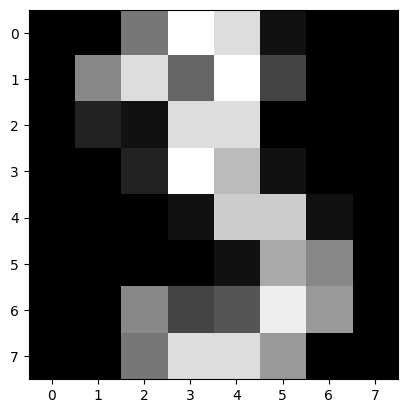

In [105]:
from matplotlib import pyplot as plt
import numpy as np

plt.imshow(x.iloc[3].values.reshape((8, 8)), cmap="gray")

## Exercise 1.2: Data Preprocessing

We have to split the dataset into training and validation. To do so we can use one of the many functions provided by scikit-learn. For example we can call ``sklearn.model_selection.StratifiedKFold()`` to have a cross validation generator.

For the sake of simplicity, however, in this tutorial we will use ``sklearn.model_selection.train_test_split`` which performs a stratified holdout cross-validation to create a single train test split (with 90% - 10% of data in this case)

In [106]:
### ENTER YOUR CODE HERE (2 lines expected)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, train_size = 0.9, shuffle = True)

I hope you positively answered the previous normalization question because yes, we **always need to normalize the data with neural networks**. The input data is stored with values in [0-16], we will normalize to [0-1].

$x = \frac{x - min(x)}{max(x)}$


We will use scikit-learn to do so, with the ``MinMaxScaler`` class. Remember to fit the scaler only on the training data, and then apply it to both the training and validation data.

In [107]:
from sklearn.preprocessing import MinMaxScaler

### ENTER YOUR CODE HERE (3 lines expected)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train.loc[:, :])
x_test = scaler.transform(x_test.loc[:, :])

print(f"Train min: {x_train.min()}, max:{x_train.max()}")
print(f"Test min: {x_test.min()}, max:{x_test.max()}")

Train min: 0.0, max:1.0
Test min: 0.0, max:1.0909090909090908


PyTorch uses ``torch.tensor``, rather than numpy arrays, so we need to
convert our data.



In [108]:
x_train = torch.as_tensor(x_train, dtype=torch.float32)
x_test = torch.as_tensor(x_test, dtype=torch.float32)
y_train = torch.as_tensor(y_train, dtype=torch.long)
y_test = torch.as_tensor(y_test, dtype=torch.long)

ValueError: could not determine the shape of object type 'Series'

## Exercise 1.3 Neural networks from scratch (no torch.nn)

Let's first create a model using nothing but PyTorch tensor operations. We assume you're already familiar with the basics of neural networks.

1. PyTorch provides methods to create random or zero-filled tensors, which we will use to create our weights and bias for a simple linear model.
2. These are just regular tensors, with one very special addition: we tell PyTorch that they require a **gradient**. This causes PyTorch to record all the operations done on the tensor.
3. This allows us and PyTorch to calculate the gradient during back-propagation **automatically**!


### The Model

We will use a very simple logistic regression with 10 output nodes (as many as the number of classes).

For the weights, we set ``requires_grad`` after the initialization, since we
don't want that step included in the gradient.

##### To Note:
1. We are initializing the weights here with the [Xavier initialisation](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf), by multiplying with 1/sqrt(n_features)).
2. The trailing ``_`` in PyTorch signifies that the operation is performed in-place (``requires_grad_()``)






In [ ]:
# initialize weights and bias
weights = torch.randn(n_features, n_classes)
weights = weights / np.sqrt(n_features)
bias = torch.randn(n_classes)
bias = bias / np.sqrt(n_features)

# tell pytorch it requires to compute the gradient
weights.requires_grad_()
bias.requires_grad_()

Thanks to PyTorch's ability to calculate gradients automatically, we can use any standard Python function (or callable object) as a model!

Let's just write a plain **matrix multiplication** and **broadcasted addition** to create a simple **linear model**.

We also need an activation function, we'll use a `log_softmax`.
Although PyTorch provides lots of pre-written loss functions, activation functions, and so forth, you can easily write your own using plain python.
PyTorch will even create fast GPU or vectorized CPU code for your function **automatically**.

In [ ]:
def model(xb):
    return log_softmax(xb @ weights + bias) # a @ b -> torch.matmul(a, b)

def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1) # => log(exp(x)/sum(exp(x_i)))


In the above, the ``@`` stands for the *matrix multiplication* operation.

Let's now call our model function on one batch of data (in this case, 64 images).  This is one *forward pass*.  


Note: our predictions won't be any better than random at this stage, since we start with random weights and we have not done any training step.



In [ ]:
bs = 64               # batch size

### ENTER YOUR CODE HERE (2 lines expected)
# a mini-batch from x
# predictions

print(preds[0], preds.shape)

As you see, the ``preds`` tensor contains not only the tensor values, but also a gradient function. We'll use this later to do the backpropagation.


### Loss and Metric

Let's implement negative log-likelihood to use as the loss function (again, we can just use standard Python).

Note that the way in which we have implemented it is just a clever way of doing the selection of the prediction corresponding to the correct label as in: $\sum_i y_i * log(f_i)$.

You can find further information on how to compute the cross entropy loss in different scenarios in this [tutorial](https://towardsdatascience.com/cross-entropy-negative-log-likelihood-and-all-that-jazz-47a95bd2e81).


If we check our loss with our random model now, we can see if we improve after a backprop pass later.



In [ ]:
def nll(output, target):
    return -output[range(target.shape[0]), target].mean()

loss_func = nll

### ENTER YOUR CODE HERE (1 line expected)


print(f"Initial Loss: {l}")

Let's also implement a function to calculate the accuracy of our model.

For each prediction, if the index with the largest value matches the target value, then the prediction was correct.

Let's check the accuracy of our random model, so we can see if our accuracy improves as our loss improves.


In [ ]:
def accuracy(out, yb):

    ### ENTER YOUR CODE HERE (2 lines expected)

    return acc_val

acc = accuracy(model(x_train), y_train)
print(f"Initial Accuracy: {acc:.2f} %")

### The training loop

We can now run a training loop.  For each iteration, we will:

1. select a mini-batch of data (of size ``bs``)
2. use the model to make predictions
3. calculate the loss
4. ``loss.backward()`` computes the gradients of the model, in this case, ``weights`` and ``bias``.
5. update the parameters to optimize the model

Note:

- We do this within the ``torch.no_grad()`` context manager, because we do not want these actions to be recorded for our next calculation of the gradient.  You can read more about how PyTorch's Autograd records operations
[here](https://pytorch.org/docs/stable/notes/autograd.html).
- We then set the gradients to zero, so that we are ready for the next loop. Otherwise, our gradients would record a running tally of all the operations that had happened (i.e. ``loss.backward()`` *adds* the gradients to whatever is already stored, rather than replacing them).



In [ ]:
lr = .5  # learning rate
epochs = 20  # how many epochs to train for
train_samples = x_train.shape[0]

for epoch in range(epochs):
    for i in range((train_samples - 1) // bs + 1):

        ## select input and label batch
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]

        ## make predictions and compute loss
        pred = model(xb)
        loss = loss_func(pred, yb)

        ## compute gradient through backprop
        loss.backward()

        ## update gradients through SGD
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()
    print(f"Epoch {epoch}: {loss_func(model(x_train), y_train):.2f}")


That's it: we've created and trained a minimal neural network (in this case, a logistic regression, since we have no hidden layers) entirely from scratch!

Let's check the loss and accuracy and compare those to what we got earlier. We expect that the loss will have decreased and accuracy to have increased, and they have.



In [ ]:
### ENTER YOUR CODE HERE (2 lines expected)



#### Let's refactor our code using torch.nn

We will now refactor our code, so that it does the same thing as before, only we'll start taking advantage of PyTorch's ``nn`` classes to make it more concise and flexible.

At each step from here, we should be making our code one or more of:
1. shorter
2. more understandable
3. more flexible



## Exercise 1.4 Refactor using nn.functional
The first and easiest step is to make our code shorter by replacing our hand-written activation and loss functions with those from ``torch.nn.functional`` (which is generally imported into the namespace ``F`` by convention).

The ``torch.nn.functional`` module contains all the functions in the ``torch.nn`` library (whereas other parts of the library contain classes). As well as a wide range of loss and activation functions, you'll also find here some convenient functions for creating deep neural networks, such as pooling functions.

If you're using negative log likelihood loss and log softmax activation, then Pytorch provides a single function ``F.cross_entropy`` that combines the two. So we can even remove the activation function from our model.

In [ ]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

Note that we no longer call ``log_softmax`` in the ``model`` function. Let's confirm that our loss and accuracy are the same as before:



In [ ]:
### ENTER YOUR CODE HERE (2 line expected)


## Exercise 1.5 Refactor using nn.Module
Next up, we'll use ``nn.Module`` (*uppercase M*) and ``nn.Parameter``, for a clearer and more concise training loop.
1. We subclass ``nn.Module`` (which itself is a class and able to keep track of its attributes).  In this case, we want to create a class that holds our weights, bias, and method for the forward step.  ``nn.Module`` has a number of attributes and methods (such as ``.parameters()`` and ``.zero_grad()``) which we will be using for this.
1. Since we're now using an object instead of just using a function, we
first have to instantiate our model:


In [ ]:
from torch import nn

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(n_features, n_classes) / np.sqrt(n_features))
        self.bias = nn.Parameter(torch.randn(n_classes) / np.sqrt(n_features))

    def forward(self, xb):
        return xb @ self.weights + self.bias

model = LogisticRegression()

Now we can calculate the loss in the same way as before. Note that ``nn.Module`` objects are used as if they are functions (i.e they are *callable*), but behind the scenes Pytorch will call our ``forward`` method automatically, i.e.
```
  def __call__(self, *args, **kwargs):
    return self.forward(args, kwargs)
```



In [ ]:
### ENTER YOUR CODE HERE (1 line expected)


#### model.parameters() and model.zero_grad()

Previously for our training loop we had to update the values for each parameter
by name, and manually zero out the grads for each parameter separately, like this:
```
  with torch.no_grad():
      weights -= weights.grad * lr
      bias -= bias.grad * lr
      weights.grad.zero_()
      bias.grad.zero_()
```

Now we can take advantage of ``model.parameters()`` and ``model.zero_grad()`` to make those steps more concise and less prone to the error of forgetting some of our parameters, particularly if we had a more complicated model:
```
  with torch.no_grad():
      for p in model.parameters():
          p -= p.grad * lr
      model.zero_grad()
```



We'll wrap our little training loop in a ``fit`` function so we can run it again later. And we double-check that our loss has gone down:

In [ ]:
def fit():
    for epoch in range(epochs):
        for i in range((train_samples - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()

            ### ENTER YOUR CODE HERE (4 lines expected)


        print(f"Epoch: {epoch}, {loss_func(model(x_train), y_train):.2f}")

fit()
print(f"Accuracy: {accuracy(model(x_train), y_train):.2f}")

## Exercise 1.6 Refactor using nn.Linear

We continue to refactor our code.  Instead of manually defining and initializing ``self.weights`` and ``self.bias``, and calculating ``xb  @ self.weights + self.bias``, we will instead use the Pytorch class [nn.Linear](https://pytorch.org/docs/stable/nn.html#linear-layers)(n_features, n_classes) for a linear layer, which does all that for us.

Pytorch has many types of **predefined layers** that can greatly simplify our code, and often makes it faster too!



In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__(n_feats, n_cls)
        ### ENTER YOUR CODE HERE (1 line expected)

    def forward(self, xb):
        return self.lin(xb)

We instantiate our model and calculate the loss in the same way as before:



In [ ]:
### ENTER YOUR CODE HERE (2 lines expected)


We are still able to use our same ``fit`` method as before.



In [ ]:
fit()
print(f"Loss: {loss_func(model(x_train), y_train)}, Accuracy: {accuracy(model(x_train), y_train)}")

## Exercise 1.7 Refactor using optim

Pytorch also has a package with various optimization algorithms, ``torch.optim``. To implement the previous stochastic gradient descent (SGD) optimization step, we can use ``optim.SGD(params, lr)`` passing to it all the model parameters and the learning rate.

We can use the ``step`` method from our optimizer to take a forward step, instead of manually updating each parameter.

This will let us replace our previous manually coded optimization step:
```
  with torch.no_grad():
      for p in model.parameters():
          p -= p.grad * lr
      model.zero_grad()
```

and instead use just:
```
# before the training loop
opt = optim.SGD(model.parameters(), lr=lr)

# in the training loop
opt.step()
opt.zero_grad()
```

``optim.zero_grad()`` resets the gradient to 0 and we need to call it **before** computing the gradient for the next minibatch.



In [ ]:
from torch import optim
model = LogisticRegression(n_features, n_classes)

### ENTER YOUR CODE HERE (1 line expected)

print(f"Accuracy: {accuracy(model(x_train), y_train)}")

def fit():
    for epoch in range(epochs):
        for i in range((train_samples - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()

            ### ENTER YOUR CODE HERE (2 lines expected)


        print(f"Epoch: {epoch}, {loss_func(model(x_train), y_train)}")

fit()
print(f"Accuracy: {accuracy(model(x_train), y_train)}")

## Exercise 1.8 Refactor using Dataset

PyTorch has an abstract Dataset class in ``torch.utils.data.Dataset``.  A Dataset can be anything that has:
*   a ``__len__`` function (called by Python's standard ``len`` function)
*   a ``__getitem__`` function as a way of indexing into it.

There are many pre-existing datasets in the [torchvision](https://pytorch.org/vision/stable/datasets.html) library. Otherwise you can also create your own.
[This tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) walks through a nice example of creating a custom ``FacialLandmarkDataset`` class as a subclass of ``Dataset``.

PyTorch's [TensorDataset](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#TensorDataset) is a Dataset wrapping tensors. By defining a length and way of indexing, this also gives us a way to iterate, index, and slice along the first dimension of a tensor.

Both ``x_train`` and ``y_train`` can be combined in a single ``TensorDataset``, which will be easier to iterate over and slice.


In [ ]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_train, y_train)

Previously, we had to iterate through minibatches of x and y values separately:
```
    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]
```

Now, we can do these two steps together:
```
    xb,yb = train_ds[i*bs : i*bs+bs] # we access all tensors in the dataset with one slicing
```



In [ ]:
model = LogisticRegression(n_features, n_classes)
opt = optim.SGD(model.parameters(), lr=lr)

print(f"Accuracy: {accuracy(model(x_train), y_train)}")
def fit():
    for epoch in range(epochs):

        for i in range((train_samples - 1) // bs + 1):

        ### ENTER YOUR CODE HERE (1 line expected)

            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        print(f"Epoch: {epoch}, {loss_func(model(x_train), y_train)}")

fit()
print(f"Accuracy: {accuracy(model(x_train), y_train)}")

## Exercise 1.9 Refactor using DataLoader

Pytorch's ``DataLoader`` is responsible for managing batches. You can create a ``DataLoader`` from any ``Dataset``. ``DataLoader`` makes it easier to iterate over batches. Rather than having to use ``train_ds[i*bs : i*bs+bs]``, the DataLoader gives us each minibatch automatically.

Also Shuffling the training data is [important](https://www.quora.com/Does-the-order-of-training-data-matter-when-training-neural-networks) to prevent correlation between batches and overfitting. DataLoader provides the parameter ``shuffle=True`` to do it.

For data intensive training (e.g. big images, or videos), it also allows to employ multiprocessing to load the data in parallel to the training loop with the parameter ``num_workers``.



In [ ]:
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

Previously, our loop iterated over batches (xb, yb) like this:

      for i in range((n-1)//bs + 1):
          xb,yb = train_ds[i*bs : i*bs+bs]
          pred = model(xb)

Now, our loop is much cleaner, as (xb, yb) are loaded automatically from the data loader:

      for xb,yb in train_dl:
          pred = model(xb)



In [ ]:
model = LogisticRegression()
opt = optim.SGD(model.parameters(), lr=lr)

print(f"Accuracy: {accuracy(model(x_train), y_train)}")
def fit():
    for epoch in range(epochs):

        ### ENTER YOUR CODE HERE (2 lines expected)

            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        print(f"Epoch: {epoch}, {loss_func(model(x_train), y_train)}")

fit()
print(f"Accuracy: {accuracy(model(x_train), y_train)}")

Thanks to Pytorch's ``nn.Module``, ``nn.Parameter``, ``Dataset``, and ``DataLoader``,
our training loop is now dramatically smaller and easier to understand. Let's
now try to add the basic features necessary to create effective models in practice.

## Exercise 1.10 Add validation

So far, we were just trying to get a reasonable training loop set up for use on our training data.  In reality, you **always** should also have a [validation set](https://www.fast.ai/2017/11/13/validation-sets/), in order to identify if you are overfitting. We will extract it from the training set and use it to evaluate the model at the end of each epoch.

We'll use a batch size for the validation set that is twice as large as that for the training set. This is because the validation set does not need backpropagation and thus takes less memory (it doesn't need to store the gradients). We take advantage of this to use a larger batch size and compute the loss more quickly by inserting the validation loop in a ``with torch.no_grad():``.




In [ ]:
### ENTER YOUR CODE HERE (5 lines expected),


print(f"Number of training samples: {len(train_dl)}, valid samples: {len(valid_dl)}")

We will calculate and print the validation loss at the end of each epoch.

Note that we always call ``model.train()`` before training, and ``model.eval()`` before inference, because these are used by some layers (not employed here) such as ``nn.BatchNorm2d`` and ``nn.Dropout`` to ensure appropriate behaviour for these different phases.



In [ ]:
model = LogisticRegression()
opt = optim.SGD(model.parameters(), lr=lr)

def fit():
    for epoch in range(epochs):
        ### ENTER YOUR CODE HERE (1 line expected)

        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()


        ### ENTER YOUR CODE HERE (6-8 lines expected)


        print(f"Epoch {epoch:.2f}: Val Loss {np.mean(valid_losses):.2f}, "
              f"Val Acc: {np.mean(valid_accs):.2f}")

fit()


## Exercise 1.11 Saving best model: early stopping
It may have happend that the model has reached the highest validation accuracy (and/or lower validation loss) not at the last epoch. It means that the model overfitted the training data.

A possible way to avoid this phenomenon is to save the model achieving the best validation accuracy (other possible solutions includes reducing the learning rate and decreasing the number of training epochs).

There exists two possible way to do it in pytorch. ``torch.save()`` and ``torch.load()`` can be used with any kind of objects. Torch will serialized this object through pickle. However, if the code generating the object is modified the code might brake in several ways. To avoid this issue, torch provides another couple of functions, ``model.state_dict()`` and ``model.load_state_dict()``, which only save and load the weights of the network.

    torch.save(model.state_dict(), "./best_model.pt")
    model.load_state_dict(torch.load("./best_model.pt"))

For further information on this topic, please read this [tutorial](https://pytorch.org/tutorials/beginner/saving_loading_models.html).


In [ ]:
model = LogisticRegression()
opt = optim.SGD(model.parameters(), lr=lr)

def fit():
    best_acc = 0.
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
        with torch.no_grad():
            valid_losses, valid_accs = [], []
            for xb, yb in valid_dl:
                valid_losses.append(loss_func(model(xb), yb))
                valid_accs.append(accuracy(model(xb), yb))

            if best_acc < np.mean(valid_accs):

                ### ENTER YOUR CODE HERE - SAVE MODEL (1 line expected)

                best_acc = np.mean(valid_accs)

        print(f"Epoch {epoch}: Loss {np.mean(valid_losses):.2f},  \
                Acc: {np.mean(valid_accs):.2f}")


    ### ENTER YOUR CODE HERE (2 lines expected)


    print(f"Best Valid Acc: {np.mean([accuracy(model(xb), yb) for xb, yb in valid_dl]):.2f}")

fit()


Was it useful to early stop the training? Is the best accuracy the same as the one at the last epoch?

Finally, we test the model on the test set to see if it generalizes well also there.
**Note**: There might be a discrepancy between the validation and test accuracy, but it should **not** be too large.

In [ ]:
model = model.cpu()

### ENTER YOUR CODE HERE (2 lines expected)


## Exercise 1.12 Using the GPU

If you're lucky enough to have access to a CUDA-capable GPU you can use it to speed up your code. To do so in COLAB you can change *runtime type* in the *Runtime* dropdown menu to enable GPU computation. After changing the runtime type you will need to rerun the whole notebook beacause all variables will be lost (*Runtime* -> *Run all*).

Let's check that your GPU is working with Pytorch. It should print ``True`` if everything is set up correctly.

In [ ]:
print(torch.cuda.is_available())

Let's then create a device object for it:



In [ ]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Finally, we can move our model and our data to the GPU.
Generally dataset do not fit in the GPU, so we need to move only the batches inside the training/validation loops:

    xb = xb.to(dev)
    yb = yb.to(dev)

In [ ]:
model = LogisticRegression().to(dev)
opt = optim.SGD(model.parameters(), lr=lr)

def fit():
    best_acc = 0.
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            ### ENTER YOUR CODE HERE (1 line expected)

            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
        with torch.no_grad():
            valid_losses, valid_accs = [], []
            for xb, yb in valid_dl:
                ### ENTER YOUR CODE HERE (1 line expected)

                valid_losses.append(loss_func(model(xb), yb).cpu())
                valid_accs.append(accuracy(model(xb), yb).cpu())

            if best_acc < np.mean(valid_accs):
                torch.save(model.state_dict(), "./best_model.pt")
                best_acc = np.mean(valid_accs)

        print(f"Epoch {epoch}: Loss {np.mean(valid_losses):.2f}, "
              f"Acc: {np.mean(valid_accs):.2f}")
    model.load_state_dict(torch.load("./best_model.pt"))
    model.eval()
    print(f"Best Valid Acc: {np.mean([accuracy(model(xb.to(dev)), yb.to(dev)).cpu() for xb, yb in valid_dl]):.2f}")

fit()

You should find it runs faster now



# Exercise 2 What has the network learnt?

So far we have seen that the network has learnt, but how can we visualize it?
There exists several mechanism to do so.



## Exercise 2.1 Weight visualization
On a logistic regression we can directly visualize both biases and weights! We will reuse the same ``im.show()`` function that we used before to visualize now the learnt weights.



In [ ]:
learnt_bias = model.lin.bias.cpu().detach()
learnt_weights = model.lin.weight.cpu().detach()
print(f"Bias: {learnt_bias}")
for i in range(10):
  ### ENTER YOUR CODE HERE (1 line expected)

  plt.title(f"Prototype of the {i} class")
  plt.show()

The images are surely blurry but they resemble somehow the standard patterns of the 0-9 digits

## Exercise 2.1 T-SNE weight projection

Otherwise with more complex model you can still see the distribution of the classes as learnt by the model through some visualization techniques. Personally I like very much [t-sne](https://lvdmaaten.github.io/tsne/): it allows to project into low dimensional representation (e.g. 2D) data which lies in very high dimensional spaces.

Let's try to projects the learnt weights into a 2D space.




In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

projected_weights = TSNE(n_components=2,init="pca", learning_rate='auto', perplexity=5).fit_transform(learnt_weights)

sns.scatterplot(x=projected_weights[:,0], y=projected_weights[:,1], hue=(str(i) for i in range(10)), legend=False)
[plt.text(projected_weights[i,0], projected_weights[i,1], s=str(i)) for i in range(10)]
plt.show()

But you can do it with the samples as well!
Let's do it with the samples in the test set


In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

projected_samples = TSNE(n_components=2, init="pca", learning_rate='auto').fit_transform(x_test)

sns.scatterplot(x=projected_samples[:,0], y=projected_samples[:,1], hue=[str(y_i.item()) for y_i in y_test])
plt.show()

# Closing thoughts

We now have a general data pipeline and training loop which you can use for
training many types of models using Pytorch.

We promised at the start of this tutorial we'd explain through example each of
``torch.nn``, ``torch.optim``, ``Dataset``, and ``DataLoader``. So let's summarize what we've seen:

 - **torch.nn**

   + ``Module``: creates a callable which behaves like a function, but can also
     contain state(such as neural net layer weights). It knows what ``Parameter`` (s) it
     contains and can zero all their gradients, loop through them for weight updates, etc.
   + ``Parameter``: a wrapper for a tensor that tells a ``Module`` that it has weights
     that need updating during backprop. Only tensors with the `requires_grad` attribute set are updated
   + ``functional``: a module(usually imported into the ``F`` namespace by convention)
     which contains activation functions, loss functions, etc, as well as non-stateful
     versions of layers such as convolutional and linear layers.
 - ``torch.optim``: Contains optimizers such as ``SGD``, which update the weights
   of ``Parameter`` during the backward step
 - ``Dataset``: An abstract interface of objects with a ``__len__`` and a ``__getitem__``,
   including classes provided with Pytorch such as ``TensorDataset``
 - ``DataLoader``: Takes any ``Dataset`` and creates an iterator which returns batches of data.
